In [2]:
import gpxpy
import gpxpy.gpx
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from folium.vector_layers import Rectangle
from shapely.geometry import LineString
from shapely.ops import unary_union

In [21]:
import numpy as np
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
observations = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            observations.append((point.latitude, point.longitude))

observations_array = np.array(observations)
# print(observations_array)
qt = observations_array[:75]
print(qt)


[[12.8850233 77.6182517]
 [12.8850233 77.6182517]
 [12.8850411 77.6182212]
 [12.8858755 77.6184592]
 [12.8860708 77.6185108]
 [12.8864345 77.6186143]
 [12.8872271 77.6187868]
 [12.8875645 77.6189671]
 [12.8878992 77.6191121]
 [12.8881981 77.6192841]
 [12.8885449 77.6196036]
 [12.8886557 77.6197327]
 [12.8894832 77.6201196]
 [12.8901219 77.6201587]
 [12.8901742 77.6201576]
 [12.8907993 77.6201401]
 [12.8914818 77.6198837]
 [12.8915329 77.6196766]
 [12.8919437 77.619673 ]
 [12.8925    77.6197667]
 [12.8925    77.6197667]
 [12.8926074 77.6197915]
 [12.8928063 77.6198369]
 [12.8930518 77.6198979]
 [12.8930785 77.6199012]
 [12.8933519 77.6198944]
 [12.8941054 77.6200443]
 [12.8942445 77.6200783]
 [12.8947926 77.6202165]
 [12.8955608 77.6204812]
 [12.896034  77.6206877]
 [12.8962801 77.6208024]
 [12.8969275 77.6211646]
 [12.8972643 77.6212654]
 [12.8974018 77.6212964]
 [12.8980419 77.6215507]
 [12.8986652 77.6217543]
 [12.8986652 77.6217543]
 [12.8988824 77.6218599]
 [12.8989865 77.6218773]


In [22]:
map_center = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap = folium.Map(location=map_center, zoom_start=12)
for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs = [(point.latitude, point.longitude) for point in segment.points]
        folium.PolyLine(lat_lon_pairs, color="blue", weight=2.5, opacity=1).add_to(mymap)
mymap

In [5]:
all_points = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points.extend([(point.longitude, point.latitude) for point in segment.points])
route_line = LineString(all_points)
buffer_distance = 0.001  
route_buffer = route_line.buffer(buffer_distance)
map_center = route_line.centroid.coords[0][::-1] 
mymap = folium.Map(location=map_center, zoom_start=14)
for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs = [(point.latitude, point.longitude) for point in segment.points]
        folium.PolyLine(lat_lon_pairs, color="blue", weight=2.5, opacity=1).add_to(mymap)
route_buffer_geojson = route_buffer.__geo_interface__
folium.GeoJson(route_buffer_geojson, name='geofence').add_to(mymap)
mymap

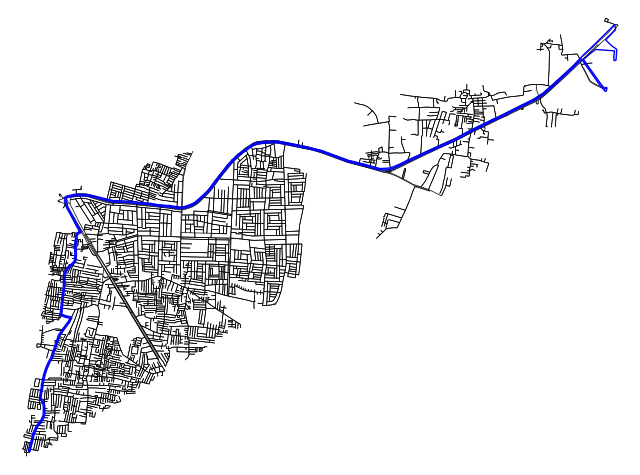

In [16]:
import osmnx as ox
from shapely.geometry import LineString

route_polygon = route_buffer.convex_hull
G = ox.graph_from_polygon(route_polygon, network_type='drive')
fig, ax = ox.plot_graph(G, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer = route_line.buffer(0.0001)  # Buffer the route line for better visibility
ax.plot(*route_line_buffer.exterior.xy, color='blue', linewidth=1)
plt.show()

#remove dead ends, remove edges and pair of nodes which have only one neighbour

In [14]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon = route_buffer.convex_hull
G = ox.graph_from_polygon(route_polygon, network_type='drive')
states = np.array([(data['y'], data['x']) for node, data in G.nodes(data=True)])
print("Number of nodes:", len(states))
print("Node coordinates:")
for node in states:
    print(node)

Number of nodes: 3775
Node coordinates:
[12.9176822 77.6243834]
[12.9209256 77.6655498]
[12.9230168 77.6653306]
[12.9231317 77.664071 ]
[12.923117  77.6630484]
[12.9230102 77.6623099]
[12.9226787 77.6515237]
[12.9158503 77.6517079]
[12.9119916 77.6518944]
[12.9085365 77.6518487]
[12.9120416 77.6460944]
[12.9145237 77.6462061]
[12.9132392 77.6461668]
[12.9129115 77.6461499]
[12.912606 77.646131]
[12.9144623 77.6474764]
[12.9140642 77.6474658]
[12.9140309 77.6489902]
[12.9157728 77.6489989]
[12.919575  77.6454813]
[12.9237805 77.6659947]
[12.9188802 77.6687125]
[12.9134673 77.6664202]
[12.9133965 77.6650797]
[12.9221699 77.6630406]
[12.9091016 77.6445516]
[12.9087347 77.649349 ]
[12.9035457 77.6487992]
[12.9186942 77.6492554]
[12.918953  77.6492598]
[12.9194764 77.649235 ]
[12.9089015 77.6472446]
[12.9091322 77.6439096]
[12.9092392 77.6413621]
[12.9092823 77.6380403]
[12.9144845 77.6381521]
[12.9121852 77.6426889]
[12.9122043 77.6420459]
[12.9122704 77.6399412]
[12.9093454 77.647329 ]
[1

In [11]:
shapefile_path = r"/Users/ashwin/Desktop/wards and gps/R_8Wards_Ground_Truth.shp"
df = gpd.read_file(shapefile_path)
df

,from,to,Name,Dscrptn,_tdyg__,weight,geometry
0,1,2,Street ID : I0013,Intermediate Road - 1233.84(m),1,124.229983,"LINESTRING (77.64914 12.94608, 77.64913 12.945..."
1,2,3,Street ID : I0013,Intermediate Road - 1233.84(m),2,68.363809,"LINESTRING (77.64832 12.94670, 77.64788 12.94715)"
2,3,4,Street ID : I0013,Intermediate Road - 1233.84(m),3,518.483420,"LINESTRING (77.64788 12.94715, 77.64782 12.947..."
3,4,5,Street ID : I0013,Intermediate Road - 1233.84(m),4,231.575650,"LINESTRING (77.64483 12.95059, 77.64478 12.950..."
4,5,6,Street ID : I0013,Intermediate Road - 1233.84(m),5,247.933598,"LINESTRING (77.64442 12.95263, 77.64432 12.953..."
...,...,...,...,...,...,...,...
9973,6204,6222,Street ID : W1365,Minor Road - 119.3(m),1561,53.060245,"LINESTRING (77.60702 12.87729, 77.60710 12.877..."
9974,5809,5812,Street ID : W1367,Minor Road - 291.99(m),1562,33.920009,"LINESTRING (77.59495 12.88115, 77.59494 12.880..."
9975,5814,5819,Street ID : W1367,Minor Road - 291.99(m),1563,22.947679,"LINESTRING (77.59477 12.88027, 77.59491 12.880..."
9976,5819,5828,Street ID : W1367,Minor Road - 291.99(m),1564,96.762885,"LINESTRING (77.59481 12.87978, 77.59484 12.879..."


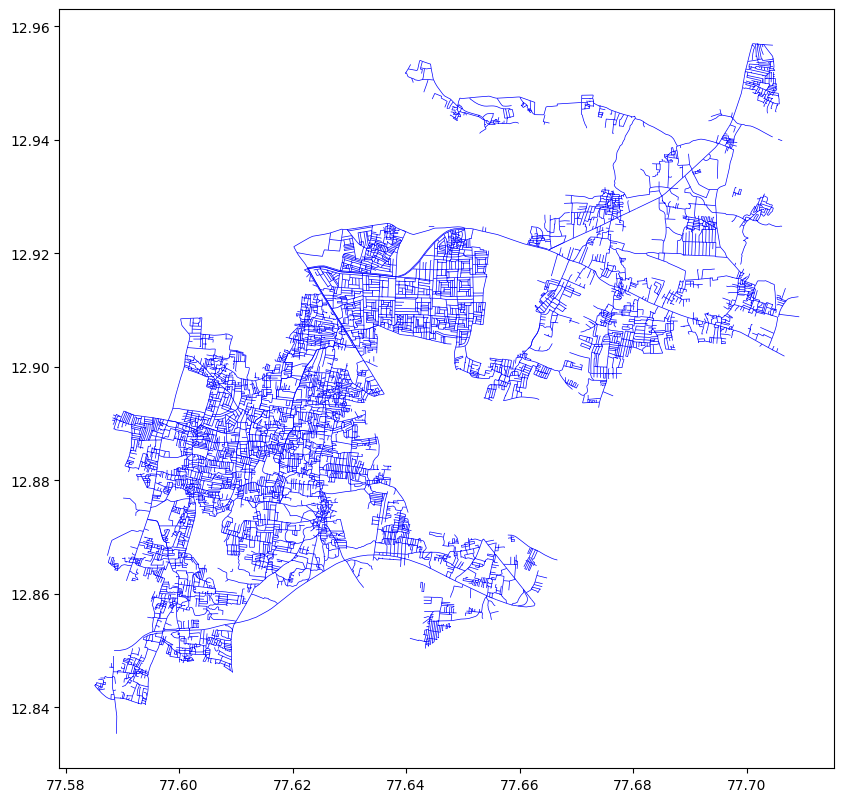

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
df.plot(ax=ax, color='blue', linewidth=0.5)
ax.set_aspect('equal')
plt.show()

In [15]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances = []
for i in range(len(observations) - 1):
    x1, y1 = observations[i]
    x2, y2 = observations[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances.append(distance)
TRANS = np.zeros((len(states), len(states), len(observations)-1))

beta = 0.95  

n = len(states)
for k in range(len(observations)-1):
    for i in range(n):
        for j in range(n):
            xtemp = np.linalg.norm(states[i] - states[j])
            dij = abs(xtemp - pairwise_distances[k])
            TRANS[i, j, k] = (1 / beta) * exp(-dij / beta)
        TRANS[i, :, k] = TRANS[i, :, k] / np.sum(TRANS[i, :, k])

sigztemp = []
for i in range(len(observations)):
    for j in range(len(states)):
        sigztemp.append(np.linalg.norm(observations[i] - states[j]))
sigz = 1.4 * np.median(sigztemp)

EMIS = np.zeros((len(states), len(observations)))
for i in range(len(observations)):
    for j in range(len(states)):
        EMIS[j, i] = (1 / (sqrt(2 * pi) * sigz)) * exp(-0.5 * ((np.linalg.norm(observations[i] - states[j])) / sigz) ** 2)

# seq = [1, 2, 3, 4]
seq = np.arange(1, len(observations)+1)

PRIOR = np.array([(1 / len(states))] * len(states))
# PRIOR[358] = 0.7

T = len(seq)  # Number of observations
n = EMIS.shape[0]  # Number of states

score = np.zeros((n, T))
pred = np.zeros((n, T))

for i in range(n):
    score[i, 0] = PRIOR[i] * EMIS[i, seq[0] - 1]

for t in range(1, T):
    for j in range(n):
        tscore = np.zeros(n)
        for k in range(n):
            tscore[k] = score[k, t - 1] * TRANS[k, j, t - 1] * EMIS[j, seq[t] - 1]
        score[j, t] = np.max(tscore)
        id = np.where(tscore == np.max(tscore))[0][0]
        pred[j, t] = id

IT = np.zeros(T, dtype=int)
IT[-1] = np.argmax(score[:, -1])

for t in range(T - 1, 0, -1):
    IT[t - 1] = int(pred[IT[t], t])

print(IT)

KeyboardInterrupt: 